# Pymaceuticals Inc.
---

### Analysis

Correlation Between Mouse Weight and Tumor Volume
The scatter plot visualizes the relationship between mouse weight and tumor volume, with a correlation coefficient of approximately 0.59. This indicates a moderate positive correlation, suggesting that heavier mice tend to have larger tumor volumes.

Summary of Findings
Tumor Volume Statistics:
Capomulin and Ramicane have the lowest mean tumor volumes.
Tumor Volume Over Time:
Capomulin and Ramicane show a decreasing trend in tumor volume over time, indicating effectiveness.
Correlation Analysis:
There is a moderate positive correlation between mouse weight and tumor volume.

 

In [301]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [303]:
# Checking the number of mice.
count = mouse_study["Mouse ID"].nunique()
count

249

In [305]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicates = duplicates['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [307]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_study[mouse_study['Mouse ID'].isin(duplicates)]
g989.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [309]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study[~mouse_study['Mouse ID'].isin(duplicates)]
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [311]:
# Checking the number of mice in the clean DataFrame.
count = mouse_study["Mouse ID"].nunique()
count

248

In [313]:
tumor = mouse_study.groupby("Drug Regimen")

tumor = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming columns for better readability
# 'Mean Tumor Volume', 'Median Tumor Volume', etc. are more descriptive column names
tumor.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 
                         'Tumor Volume Std. Dev.', 'Tumor Volume SEM']
summary_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Summary Statistics

In [316]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = mouse_study.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Assemble the resulting series into a single summary DataFrame.
tumor.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']
tumor.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [318]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

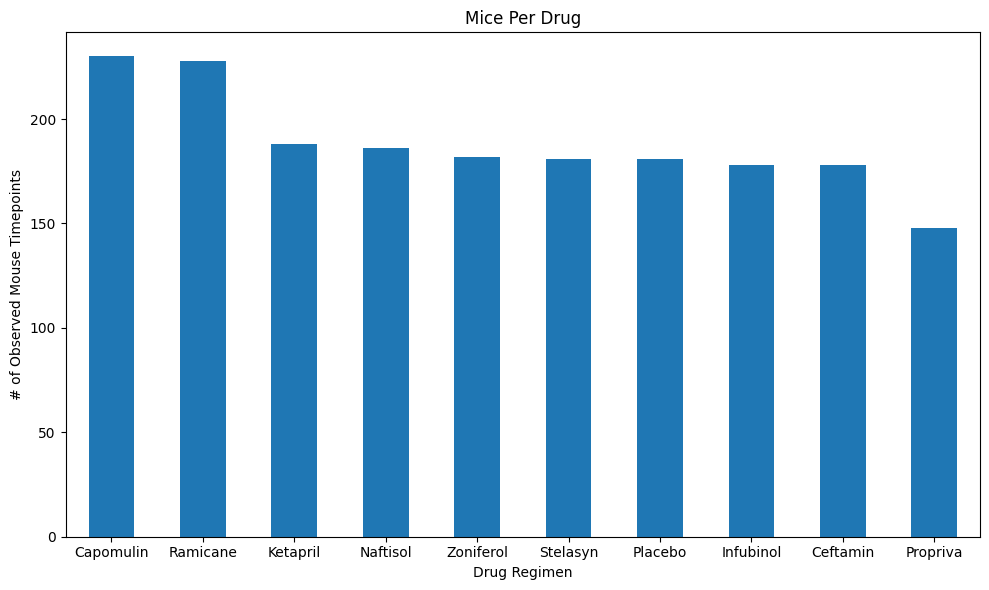

In [321]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_points = mouse_study["Drug Regimen"].value_counts()
mouse_points.plot(kind="bar", figsize=(10, 6))
plt.title("Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=0)
plt.tight_layout()
mouse_points

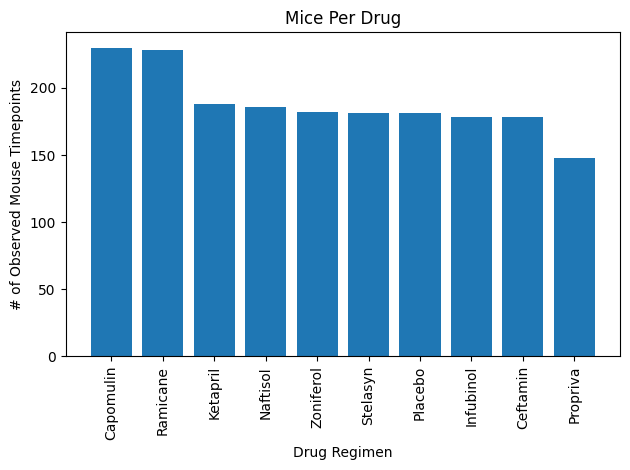

In [322]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=mouse_points.index, height=mouse_points.values)
plt.title("Mice Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64

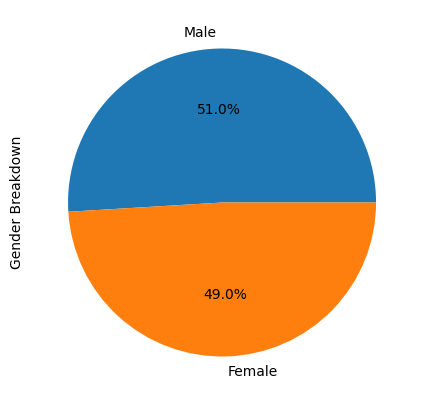

In [323]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_study.groupby("Sex")
gender = mouse_study["Sex"].value_counts()
gender.plot(kind="pie",autopct='%1.1f%%', figsize=(5, 5))
plt.ylabel("Gender Breakdown")
gender

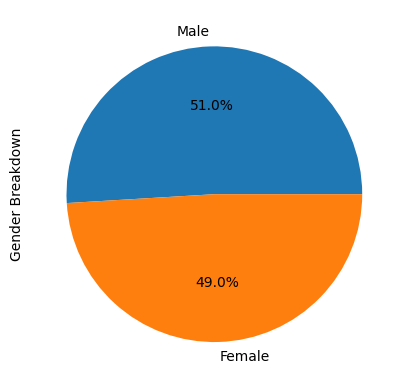

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index, autopct="%1.1f%%")
plt.ylabel("Gender Breakdown")
plt.show()

## Quartiles, Outliers and Boxplots

In [328]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_mouse_study = mouse_study[mouse_study['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_mouse_study.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, filtered_mouse_study, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [330]:
treatment_study = pd.DataFrame(final_tumor_volume)

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dictionary to fill with tumor volume data (for plotting)
tumor_vol_data = {treatment: [] for treatment in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = treatment_study[treatment_study['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the dictionary
    tumor_vol_data[treatment] = treatment_data.tolist()  # Convert Series to list
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\dljoh\AppData\Local\Temp\ipykernel_12912\983649487.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tumor_vol_data[treatment] for treatment in treatments], labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))


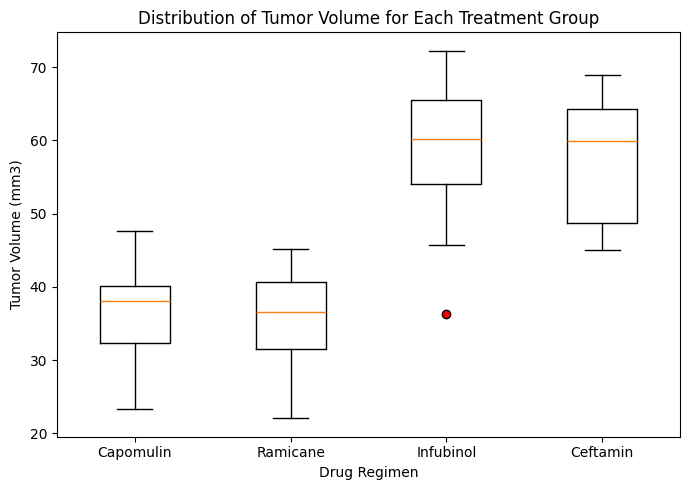

In [333]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 5))
plt.boxplot([tumor_vol_data[treatment] for treatment in treatments], labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))

# Customize the plot
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

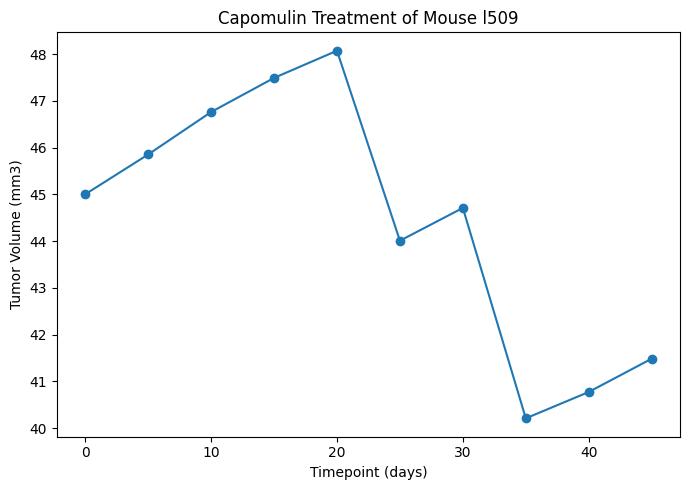

In [337]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
treatment = 'Capomulin'
filtered_data = mouse_study[(mouse_study['Mouse ID'] == mouse_id) & (mouse_study['Drug Regimen'] == treatment)]
plt.figure(figsize=(7, 5))
plt.plot(filtered_data['Timepoint'], filtered_data['Tumor Volume (mm3)'], marker='o')

# Customize the plot
plt.title(f'{treatment} Treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


# Show the plot
plt.tight_layout()
plt.show()

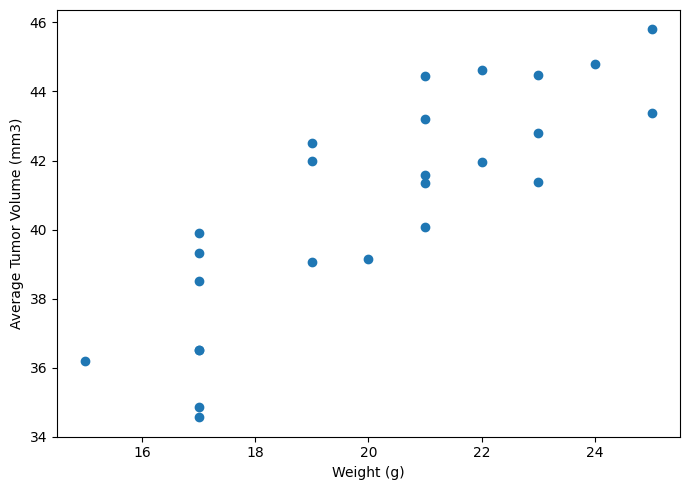

In [339]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
treatment = 'Capomulin'
filtered_data = mouse_study[(mouse_study['Drug Regimen'] == treatment)]
capomulin_avg = filtered_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
plt.figure(figsize=(7, 5))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R: 0.8419363424694721
R-squared: 0.7088568047708723
P: 1.3225722434712404e-07
Std Err: 0.12754359033201323


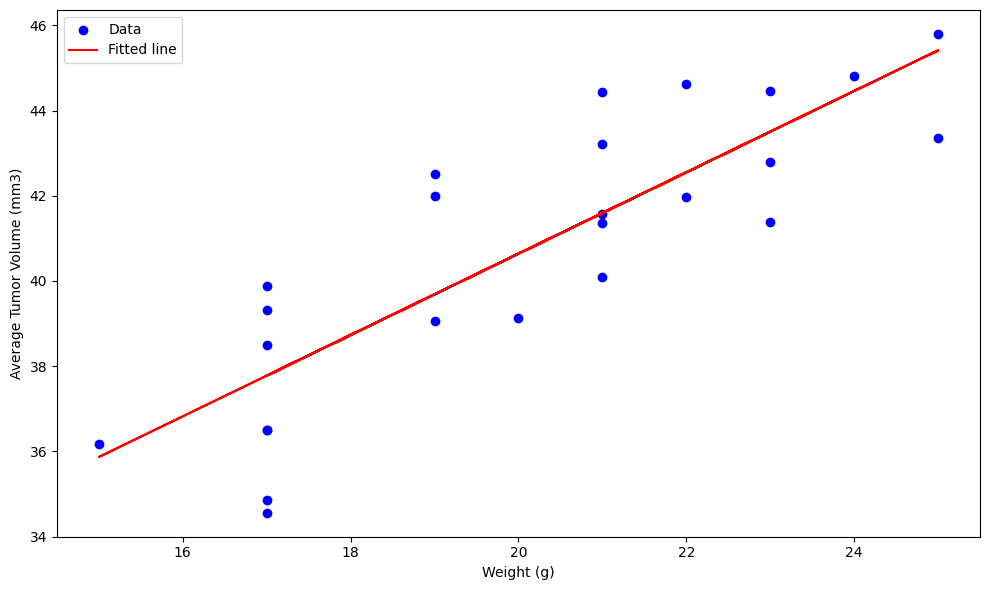

The correlation between mouse weight and the average tumor volume is 0.84


In [358]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0, 1]
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R: {r_value}")
print(f"R-squared: {r_value**2}")
print(f"P: {p_value}")
print(f"Std Err: {std_err}")
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='b', label='Data')
plt.plot(capomulin_avg['Weight (g)'], intercept + slope * capomulin_avg['Weight (g)'], 'r', label='Fitted line')
plt.legend()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(r_value, 2)}")